- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [9]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                          test_size = 0.2,
                                                          random_state = 12)

In [10]:
# 모델 정의
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation = "softmax"))
    
    return model

In [11]:
model = model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [13]:
history = model.fit(scaled_train, y_train, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7595 - loss: 0.6899
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8584 - loss: 0.3930
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3597
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 0.3352
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3163


In [8]:
scaled_train.shape, y_train.shape

((48000, 28, 28), (60000,))

- verbose
    - 훈련 과정 출력을 조정
    - 0 : 훈련 과정 출력 안함
    - 1 : 에포크마다 진행 막대와 함께 지표 출력
    - 2 : 진행 막대를 빼고 출력

In [15]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile에서 accuracy를 추가하여서 loss와 accuracy가 포함됨

In [16]:
history.history

{'accuracy': [0.8081874847412109,
  0.8586249947547913,
  0.8712083101272583,
  0.879854142665863,
  0.8849999904632568],
 'loss': [0.5398983359336853,
  0.39504384994506836,
  0.35691484808921814,
  0.33577123284339905,
  0.32099491357803345]}

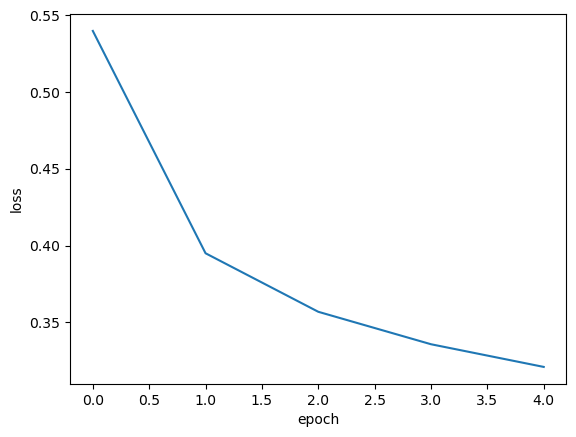

In [17]:
plt.figure()

plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

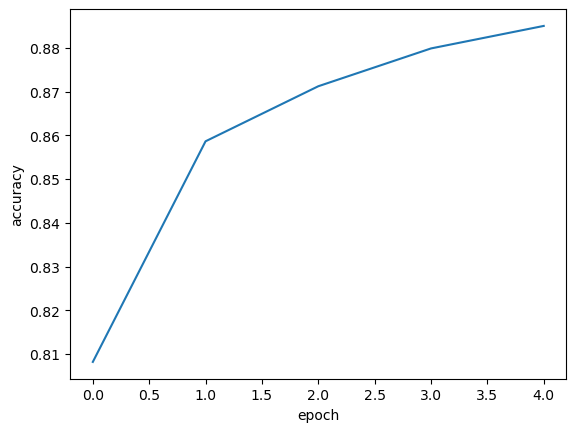

In [18]:
plt.figure()

plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [19]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7612 - loss: 0.6904
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8537 - loss: 0.4062
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3606
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8815 - loss: 0.3340
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8891 - loss: 0.3087
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8904 - loss: 0.3054
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8931 - loss: 0.3013
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8981 - loss: 0.2875
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.8990 - loss: 0.2799
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9030 - loss: 0.2789
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9068 - loss: 0.2617
Epoch 12/20
1500/150

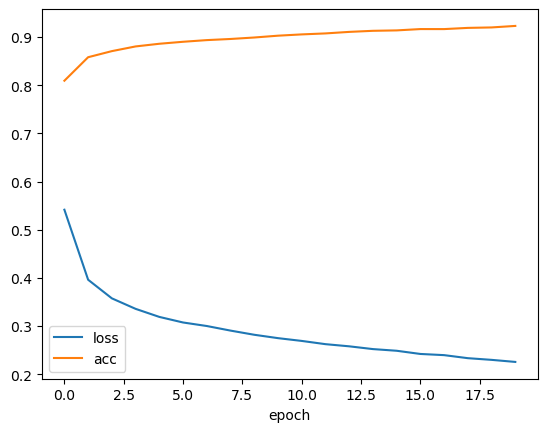

In [20]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [21]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7630 - loss: 0.6848 - val_accuracy: 0.8543 - val_loss: 0.4070
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8528 - loss: 0.4072 - val_accuracy: 0.8678 - val_loss: 0.3768
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8660 - loss: 0.3668 - val_accuracy: 0.8714 - val_loss: 0.3618
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8792 - loss: 0.3303 - val_accuracy: 0.8788 - val_loss: 0.3558
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8842 - loss: 0.3211 - val_accuracy: 0.8813 - val_loss: 0.3518
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8915 - loss: 0.3014 - val_accuracy: 0.8868 - val_loss: 0.3403
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.2990 - val_accuracy: 0.8741 - val_loss: 0.3869
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.2873 - val_accurac

In [22]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [23]:
history.history

{'accuracy': [0.8108124732971191,
  0.8563541769981384,
  0.8707083463668823,
  0.878291666507721,
  0.8855416774749756,
  0.8897500038146973,
  0.8933125138282776,
  0.8965208530426025,
  0.8998958468437195,
  0.9025833606719971,
  0.9045208096504211,
  0.906499981880188,
  0.9104999899864197,
  0.9117500185966492,
  0.9126041531562805,
  0.9146666526794434,
  0.9168541431427002,
  0.9183541536331177,
  0.9201250076293945,
  0.9221458435058594],
 'loss': [0.5354604721069336,
  0.39740678668022156,
  0.3590867221355438,
  0.335006982088089,
  0.3214106261730194,
  0.3073923885822296,
  0.29950690269470215,
  0.2912178933620453,
  0.2818472385406494,
  0.2764647603034973,
  0.26923301815986633,
  0.2637108862400055,
  0.2540922462940216,
  0.2506318688392639,
  0.24619604647159576,
  0.24194100499153137,
  0.2371734231710434,
  0.23513895273208618,
  0.22874823212623596,
  0.22656643390655518],
 'val_accuracy': [0.8543333411216736,
  0.8678333163261414,
  0.8714166879653931,
  0.8787500

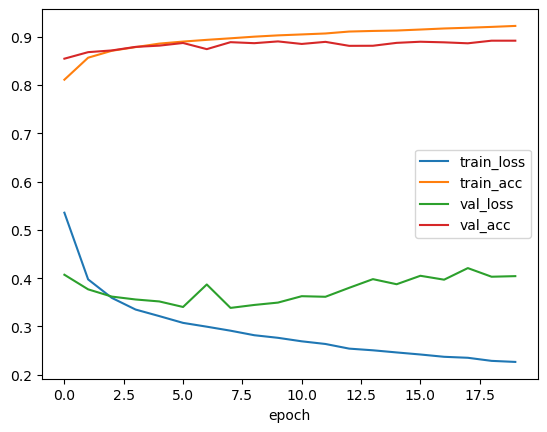

In [25]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [27]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7712 - loss: 0.6770 - val_accuracy: 0.8586 - val_loss: 0.4132
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4092 - val_accuracy: 0.8632 - val_loss: 0.3763
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8694 - loss: 0.3611 - val_accuracy: 0.8743 - val_loss: 0.3519
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3283 - val_accuracy: 0.8723 - val_loss: 0.3466
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8850 - loss: 0.3162 - val_accuracy: 0.8791 - val_loss: 0.3438
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.2937 - val_accuracy: 0.8804 - val_loss: 0.3409
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8941 - loss: 0.2824 - val_accuracy: 0.8879 - val_loss: 0.3209
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8980 - loss: 0.2733 - 

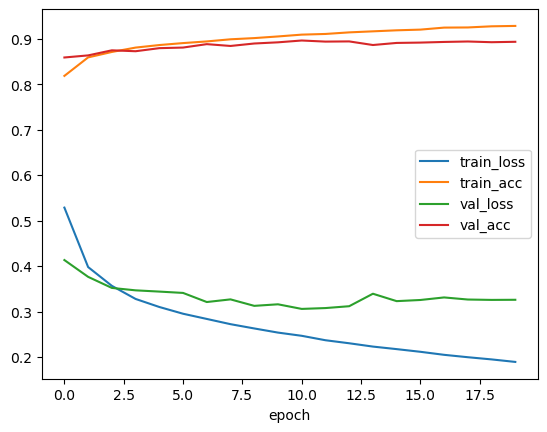

In [28]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- RMSprop을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(Dropout)

<img src = "./img/dropout.png">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
        
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [29]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃
model.summary() 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [30]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [31]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val)) 

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7292 - loss: 0.7723 - val_accuracy: 0.8535 - val_loss: 0.4094
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8339 - loss: 0.4536 - val_accuracy: 0.8618 - val_loss: 0.3929
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8535 - loss: 0.4098 - val_accuracy: 0.8683 - val_loss: 0.3703
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3959 - val_accuracy: 0.8808 - val_loss: 0.3406
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8662 - loss: 0.3679 - val_accuracy: 0.8787 - val_loss: 0.3432
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3561 - val_accuracy: 0.8782 - val_loss: 0.3415
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3492 - val_accuracy: 0.8852 - val_loss: 0.3309
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8752 - loss: 0.3406 - 

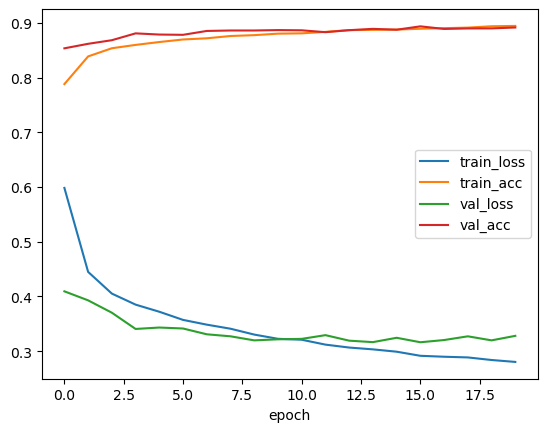

In [32]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

## 모델 저장과 복원

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 12, validation_data = (scaled_val, y_val))

Epoch 1/12


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7402 - loss: 0.7512 - val_accuracy: 0.8592 - val_loss: 0.3965
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8374 - loss: 0.4483 - val_accuracy: 0.8633 - val_loss: 0.3791
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8514 - loss: 0.4016 - val_accuracy: 0.8711 - val_loss: 0.3639
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3817 - val_accuracy: 0.8739 - val_loss: 0.3514
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8683 - loss: 0.3619 - val_accuracy: 0.8732 - val_loss: 0.3431
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3505 - val_accuracy: 0.8804 - val_loss: 0.3324
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3521 - val_accuracy: 0.8767 - val_loss: 0.3379
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3423 - val_accurac

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [41]:
model.save_weights("./model/model.weights.h5")

In [42]:
model.save("./model/model-whole.h5")

## 모델 파라미터만 읽어오기

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("./model/model.weights.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.evaluate(scaled_val, y_val)

ValueError: You must call `compile()` before using the model.

- load_weights() 메서드를 사용하면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져와야함

In [47]:
val_labels = np.argmax(model.predict(scaled_val), axis = 1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step


In [48]:
val_labels

array([4, 0, 8, ..., 0, 7, 5], dtype=int64)

In [49]:
y_val

array([3, 0, 8, ..., 0, 7, 5], dtype=uint8)

In [51]:
np.mean(val_labels == y_val) # 예측 정확도

0.8845

- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 있기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음
- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 True, 다르면 False
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [52]:
model = keras.models.load_model("./model/model-whole.h5")

In [53]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8842 - loss: 0.3108


[0.32105135917663574, 0.8845000267028809]